In [1]:
import pandas as pd # Python library for data analysis and data frame
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# libraries for text processing and handling text data
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from collections import Counter

# all the required models 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# for hyperparameter tuning
import optuna

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [2]:
import nltk
#nltk.download()

In [3]:
import string 
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import pandas as pd
df = pd.read_csv('emails.csv')
df.head()
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

In [4]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [5]:
len(df)

5728

In [6]:
df['text'] = df['text'].astype(str)

In [7]:
stopwords = list(stopwords.words('english'))

In [8]:
df['text'].head(4)

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
Name: text, dtype: object

In [9]:
stopwords= nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [10]:
stop = set(nltk.corpus.stopwords.words("english"))
print(stop)

{"you'd", "weren't", 'he', 'down', 'them', 'wouldn', 'same', 'only', 'at', 'under', 'aren', 'yourself', 'against', 'how', 'ourselves', "it's", 'myself', 'during', 'been', 'these', 'very', 'yourselves', 'our', 'most', 'm', 'had', 'with', 'll', "haven't", 'what', "shan't", 'doing', 'they', 'is', 's', 'more', 'further', "won't", 'above', 'for', 'their', 're', "that'll", 'hasn', 'off', 'won', 'why', 'such', 'all', 've', 'which', 'd', 'too', 'needn', 'again', 'her', "aren't", 'mightn', 'ain', "needn't", 'your', 'where', "you've", 't', 'here', 'y', 'ours', "didn't", 'so', "shouldn't", 'then', "mustn't", 'each', 'have', 'we', 'than', 'about', 'once', 'haven', 'between', "she's", 'or', 'shouldn', 'has', 'himself', 'my', 'being', "hadn't", 'isn', 'having', 'hers', 'its', 'am', 'and', 'themselves', 'the', 'a', 'an', 'over', 'his', 'on', 'those', 'doesn', 'few', 'there', 'nor', "couldn't", 'does', 'can', 'this', 'be', 'other', 'before', 'any', 'do', 'no', 'herself', 'in', 'it', 'couldn', 'yours',

In [11]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re

def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)
def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()
def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

def remove_stopwords_func(text):
         text_split= text.split(" ")
         return " ".join(t for t in text_split if t not in stop)

df['text'] = df['text'].apply(remove_stopwords_func)
df['Clean_text'] = df['text'].astype(str)
df['Clean_text'] = df['Clean_text'].str.lower()
df['Clean_text'] = df['Clean_text'].apply(remove_punctuation_func)
df['Clean_text'] = df['Clean_text'].apply(remove_extra_whitespaces_func)
df['textCount'] = df['text'].apply(word_count_func)
df['CleanCount'] = df['Clean_text'].apply(word_count_func)
df.head(50)

,text,spam,Clean_text,textCount,CleanCount
0,Subject: naturally irresistible corporate iden...,1,subject naturally irresistible corporate ident...,249,114
1,Subject: stock trading gunslinger fanny merri...,1,subject stock trading gunslinger fanny merrill...,64,64
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...,52,45
3,Subject: 4 color printing special request add...,1,subject 4 color printing special request addit...,79,55
4,"Subject: money , get software cds ! software ...",1,subject money get software cds software compat...,31,19
5,"Subject: great nnews hello , welcome medzonli...",1,subject great nnews hello welcome medzonline s...,69,60
6,Subject: ' hot play motion homeland security ...,1,subject hot play motion homeland security inve...,1122,832
7,Subject: save money buy getting thing tried c...,1,subject save money buy getting thing tried cia...,53,41
8,Subject: undeliverable : home based business g...,1,subject undeliverable home based business grow...,102,69
9,Subject: save money buy getting thing tried c...,1,subject save money buy getting thing tried cia...,53,41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        5728 non-null   object
 1   spam        5728 non-null   int64 
 2   Clean_text  5728 non-null   object
 3   textCount   5728 non-null   int64 
 4   CleanCount  5728 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 223.9+ KB


In [13]:
df.shape

(5728, 5)

In [14]:
df.isnull().sum()

text          0
spam          0
Clean_text    0
textCount     0
CleanCount    0
dtype: int64

In [15]:
df.duplicated().sum()

33

In [16]:
# dropping null values
df.dropna(inplace=True)

In [17]:
#Adding a column of numbers of charachters,words and sentences in each mail

df['no_char'] = df['Clean_text'].apply(len)
df['no_words'] = df['Clean_text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_sent'] = df['Clean_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

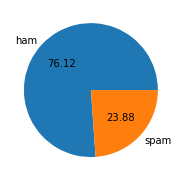

In [18]:
# Let's see the distribution of target variable
plt.figure(figsize=(3,6))
plt.pie(df['spam'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

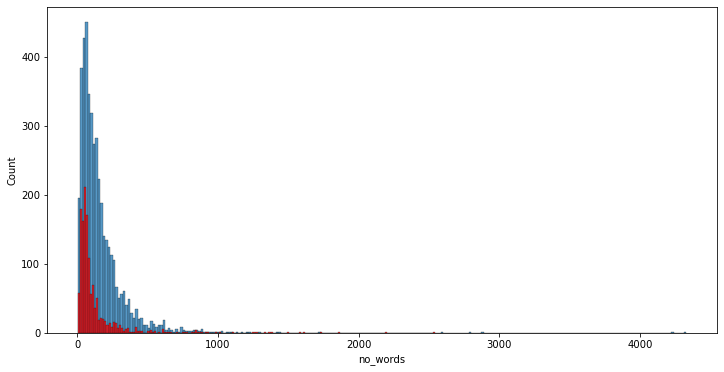

In [19]:
# Lets see the distribution of number of words in spam and ham emails
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['no_words'])
sns.histplot(df[df['spam'] == 1]['no_words'], color='red')
plt.show()

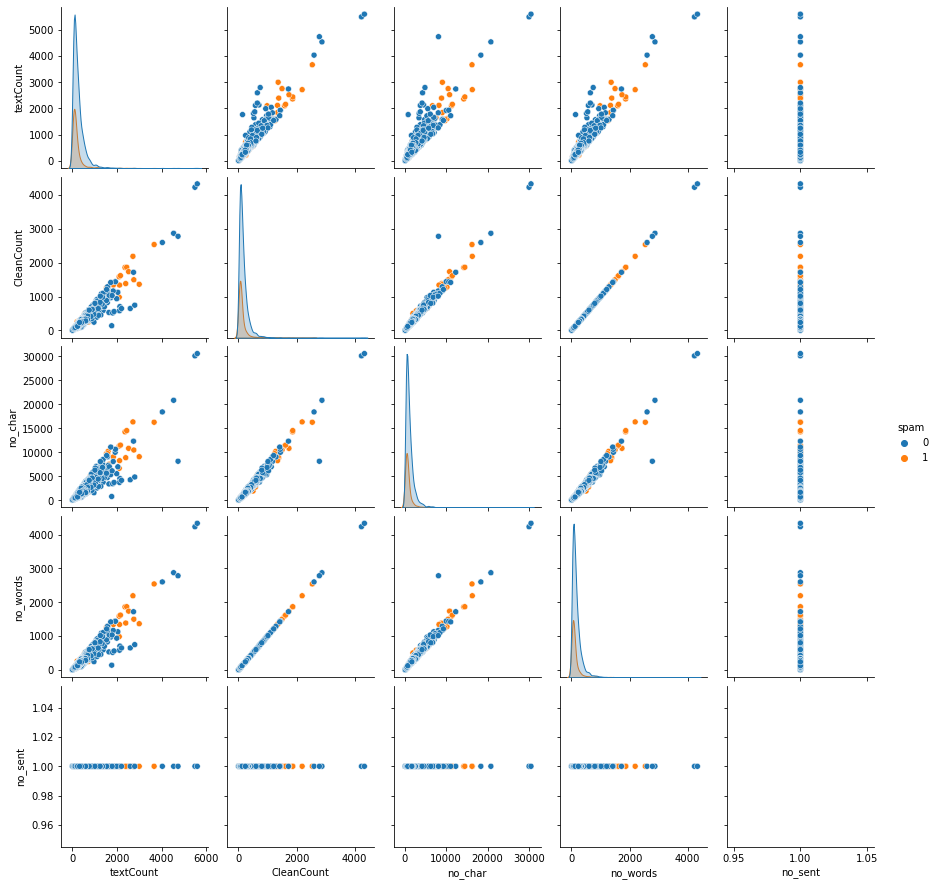

In [20]:
sns.pairplot(df, hue='spam')
plt.show()

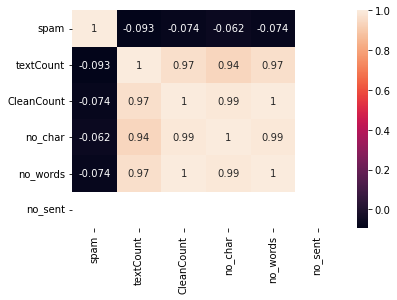

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# setting specs of word cloud image
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')

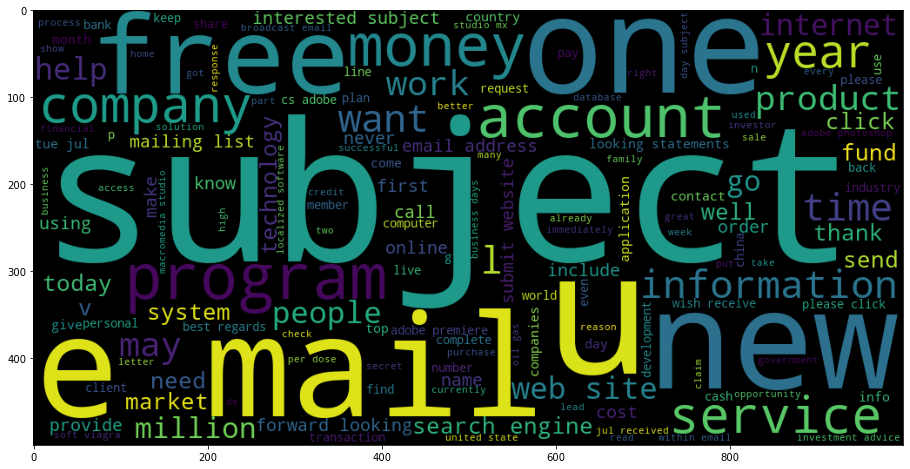

In [23]:
# creating word cloud of spam emails
spam_wc = wc.generate(df[df['spam'] == 1]['Clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

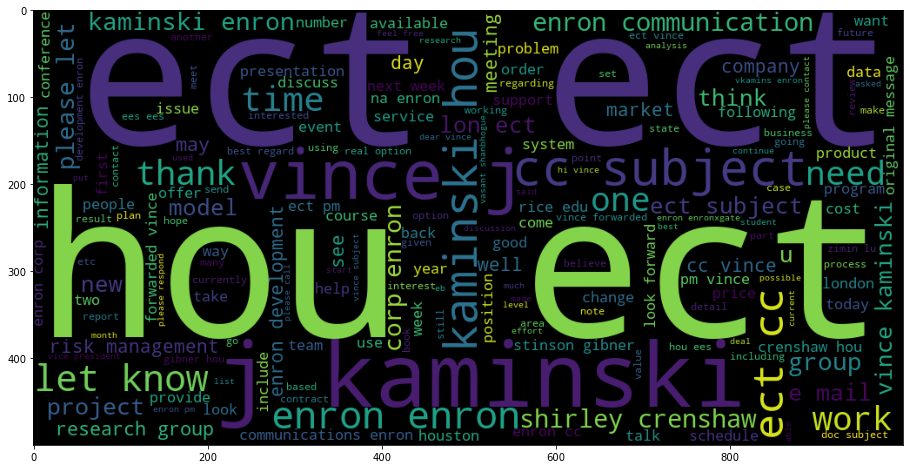

In [24]:
# creating word cloud of ham emails
ham_wc = wc.generate(df[df['spam'] == 0]['Clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [25]:
# creating list of all the words in processed spam emails
spam_corpus = []
for mail in df[df['spam'] == 1]['Clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

# number of words in all spam mails
len(spam_corpus)

174804

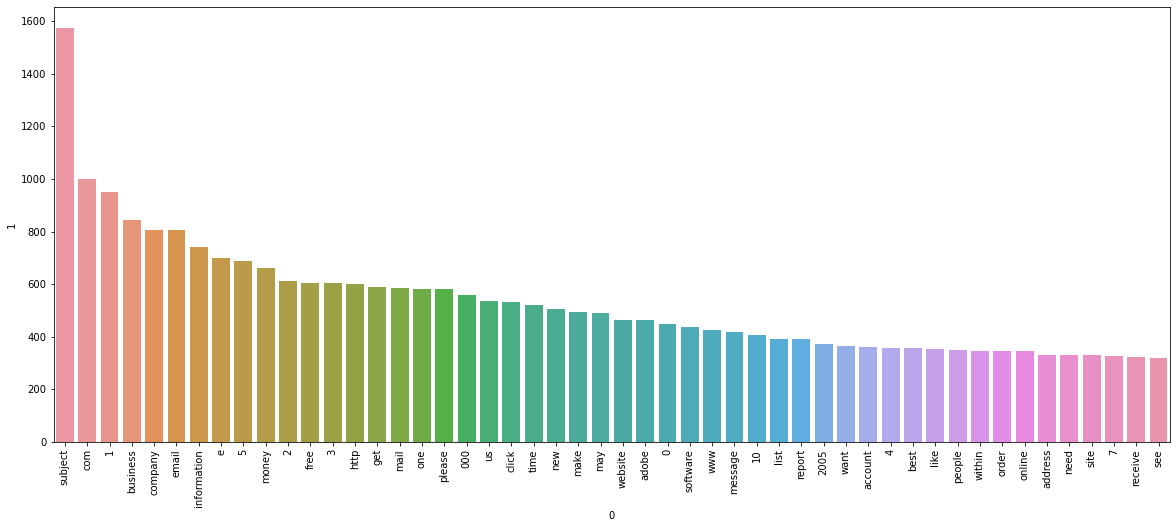

In [26]:
# top 50 most occuring words in spam mails
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# creating list of all the words in processed ham emails
ham_corpus = []
for mail in df[df['spam'] == 0]['Clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

707431

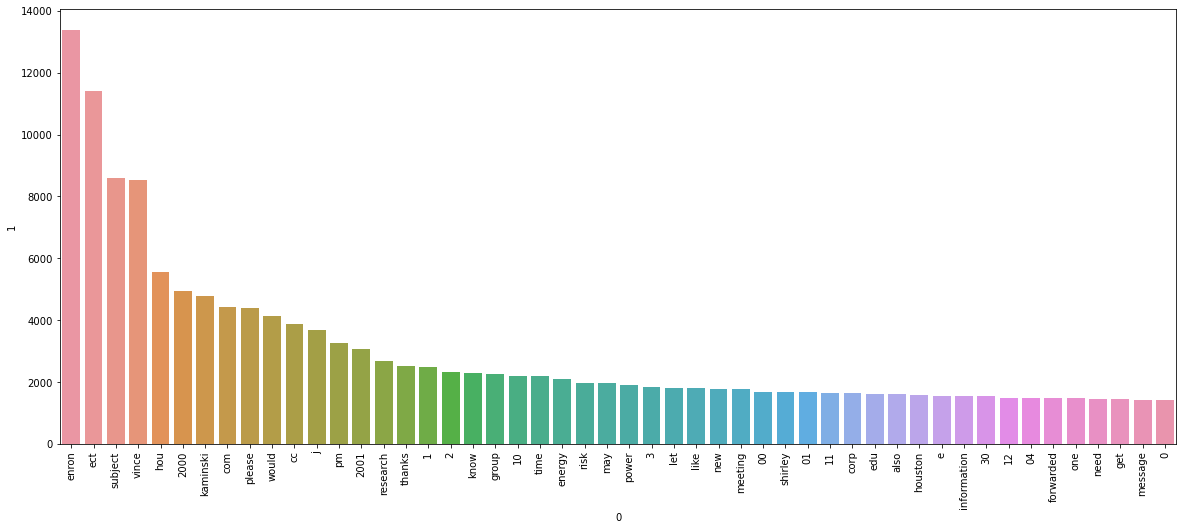

In [28]:
# top 50 most occuring words in ham mails
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)

# Setting up features and target as x and y
x = tfidf.fit_transform(df['Clean_text']).toarray()
y = df['spam'].values

In [30]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [31]:
x = df['text']
y = df['spam']

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
modelTfidf =TfidfVectorizer()
modelTfidf.fit(x)
X_vectors = modelTfidf.transform(x)

In [33]:
X_vectors

<5728x37167 sparse matrix of type '<class 'numpy.float64'>'
	with 547276 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_vectors ,y,test_size=0.2 ,random_state=42)

print(x_train.shape)
print(y_train.shape)

(4582, 37167)
(4582,)


In [35]:
#gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
#abc = AdaBoostClassifier(n_estimators=50, random_state=0)
#bc = BaggingClassifier(n_estimators=50, random_state=0)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
#gbdt = GradientBoostingClassifier(n_estimators=50,random_state=0)
#xgb = XGBClassifier(n_estimators=50,random_state=0)
#sgd = SGDClassifier(random_state=0)
#cat = CatBoostClassifier(verbose=0, random_state=0)
#lgbm = LGBMClassifier(random_state=0)

In [36]:
classifiers = {
    #'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    #'SVC' : svc,
    'KNeighbors' : knc, 
    'DecisionTree': dtc, 
    'LogisticRegression': lrc, 
    'RandomForest': rfc, 
    #'AdaBoost': abc, 
    #'BaggingClassifier': bc, 
    #'ExtraTreesClassifier': etc,
    #'GradientBoosting': gbdt,
    #'XGB': xgb,
    #'SGD' : sgd
    #'Catboost' : cat,
    #'LGBM' : lgbm 
}

In [37]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):
    
    classifiers.fit(x_train,y_train)
   
    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [38]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name,classifiers in classifiers.items():
    
    current_accuracy,current_precision = train_classifier(classifiers, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  MultinomialNB
Accuracy -  0.8891797556719022
Precision -  1.0 

For  BernoulliNB
Accuracy -  0.9729493891797557
Precision -  0.977859778597786 

For  KNeighbors
Accuracy -  0.974694589877836
Precision -  0.981549815498155 

For  DecisionTree
Accuracy -  0.9136125654450262
Precision -  0.7588075880758808 

For  LogisticRegression
Accuracy -  0.9738219895287958
Precision -  0.9513888888888888 

For  RandomForest
Accuracy -  0.9677137870855148
Precision -  1.0 



In [39]:
accuracy_knc,precision_knc = train_classifier(knc, x_train,y_train,x_test,y_test)

print("Accuracy - ",accuracy_knc)
print("Precision - ",precision_knc,'\n')

accuracy_scores.append(accuracy_knc)
precision_scores.append(precision_knc)

Accuracy -  0.974694589877836
Precision -  0.981549815498155 



In [40]:
 y_pred = classifiers.predict(x_test)

In [41]:
import sklearn.metrics as metrics
print('f1_score: %.3f' % metrics.f1_score(y_test, y_pred))

f1_score: 0.932


In [42]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()



cross_val_score(knc, digits.data, digits.target, scoring='accuracy', cv=10).mean()

nan

In [43]:
accuracy_knc,precision_knc = train_classifier(knc, x_train,y_train,x_test,y_test)

print("Accuracy - ",accuracy_knc)
print("Precision - ",precision_knc,'\n')

accuracy_scores.append(accuracy_knc)
precision_scores.append(precision_knc)

Accuracy -  0.974694589877836
Precision -  0.981549815498155 



In [44]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model  AUC score: 0.9362068965517241


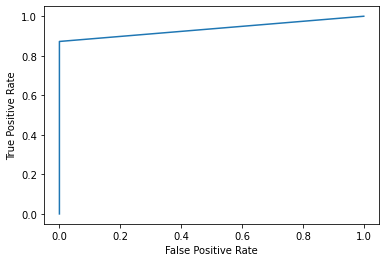

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
plot_roc_curve(y_test, y_pred)
print(f'model  AUC score: {roc_auc_score(y_test, y_pred)}')

In [46]:

#import pickle
#s = pickle.dumps(clf)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])

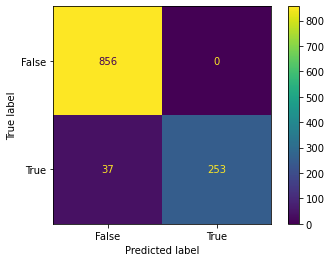

In [47]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#actual = numpy.random.binomial(1,.9,size = 1000)
#predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [48]:
from sklearn.metrics import classification_report

# Check the auc score of the model
print(f'roc_auc_score: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

roc_auc_score: 0.9362068965517241

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       856
           1       1.00      0.87      0.93       290

    accuracy                           0.97      1146
   macro avg       0.98      0.94      0.96      1146
weighted avg       0.97      0.97      0.97      1146



In [49]:
import pickle

model=knc.fit(x_train,y_train)

filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.974694589877836


In [50]:
from joblib import dump
dump(knc,'model.joblib')
dump(modelTfidf,'tfidf.joblib')

['tfidf.joblib']

In [51]:
from flask import Flask, render_template, request
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd



In [52]:
app = Flask(__name__)

In [53]:
@app.route('/')
def home():
    return render_template('index.html')

In [54]:
@app.route('/predict', methods=['POST'])
def predict():
    df = pd.read_csv("emails.csv", encoding="latin-1")
    df['text'] = df['text'].apply(remove_stopwords_func)
    df['Clean_text'] = df['text'].astype(str)
    df['Clean_text'] = df['Clean_text'].str.lower()
    df['Clean_text'] = df['Clean_text'].apply(remove_punctuation_func)
    df['Clean_text'] = df['Clean_text'].apply(remove_extra_whitespaces_func)
    df['textCount'] = df['text'].apply(word_count_func)
    df['CleanCount'] = df['Clean_text'].apply(word_count_func)    
    df.dropna(inplace=True)
    df['no_char'] = df['Clean_text'].apply(len)
    df['no_words'] = df['Clean_text'].apply(lambda x:len(nltk.word_tokenize(x)))
    df['no_sent'] = df['Clean_text'].apply(lambda x:len(nltk.sent_tokenize(x)))
    ham_corpus = []
    for mail in df[df['spam'] == 0]['Clean_text'].tolist():
        for word in mail.split():
            ham_corpus.append(word)
            
   # tfidf = TfidfVectorizer(max_features=17000)

    #x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
    X = df['text']
    y = df['spam']
    

    
    # Extract Feature With CountVectorizer
    CV = CountVectorizer()
    X = CV.fit_transform(X)  # Fit the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    #modelTfidf =TfidfVectorizer()
    #modelTfidf.fit(x)
    #X_vectors = modelTfidf.transform(x)
    
    #clf = make_pipeline(kernel='sigmoid', SVC(gamma=1.0))
        
    clf=KNeighborsClassifier()
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)

    #clf = train_classifier(svc, x_train,y_train,x_test,y_test)
    #clf.score(X_test, y_test)
    
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        vect = CV.transform(data).toarray()
        my_prediction = clf.predict(vect)
    return render_template('index.html', prediction=my_prediction)

    

In [ ]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Apr/2023 10:05:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 10:05:06] "GET /static/style.css HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 10:05:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2023 10:05:44] "GET /static/style.css HTTP/1.1" 200 -
